In [1]:
# Please install following libraries
#     Numpy
#     Pandas
#     Seaborn
#     Matplotlib
#     sklearn
#     torch

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch

%matplotlib inline

In [3]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

# Models
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier



#### File Reading

In [4]:
csvFileLocation = 'data/targetfirm_prediction_dataset_small.csv'

In [5]:
finance_dataframe = pd.read_csv(csvFileLocation)

In [6]:
finance_dataframe.head()

,Unnamed: 0,gvkey,fyear,target,at,revt,ib,ca,capx,ceq,che,emp,invt,re,xrd,dltt,dv,sic
0,6,1004,2000.0,0.0,701.854,874.255,18.531,NaN,13.134,340.212,13.809,2.5,320.590,204.065,NaN,179.987,9.157,5080.0
1,7,1004,2001.0,0.0,710.199,638.721,-58.939,NaN,12.112,310.235,34.522,2.2,286.588,139.603,NaN,217.699,4.430,5080.0
2,8,1004,2002.0,0.0,686.621,606.337,-12.410,NaN,9.930,294.988,29.154,2.1,259.954,124.106,NaN,164.658,0.797,5080.0
3,9,1004,2003.0,0.0,709.292,651.958,3.504,NaN,10.286,301.684,41.010,2.3,247.245,131.884,NaN,248.666,0.000,5080.0
4,10,1004,2004.0,0.0,732.230,747.848,18.572,NaN,13.033,314.744,50.338,2.6,255.477,142.450,NaN,227.159,0.000,5080.0


#### Data Cleaning

In [7]:
finance_dataframe.isna().sum()

Unnamed: 0         0
gvkey              0
fyear              0
target             0
at             34635
revt           35677
ib             35660
ca            211399
capx           63184
ceq            35063
che            57076
emp            63859
invt           53353
re             40548
xrd           150287
dltt           35036
dv             65058
sic                3
dtype: int64

In [8]:
finance_dataframe.fillna(0,inplace=True)

In [9]:
finance_dataframe.isna().sum()

Unnamed: 0    0
gvkey         0
fyear         0
target        0
at            0
revt          0
ib            0
ca            0
capx          0
ceq           0
che           0
emp           0
invt          0
re            0
xrd           0
dltt          0
dv            0
sic           0
dtype: int64

In [10]:
# features not using Unnamed: 0, gvkey, fyear and no target
finance_features = finance_dataframe.iloc[:,3:len(finance_dataframe.columns)]
y = finance_features['target']

#### Data Visualization

In [11]:
finance_features.corr()

,target,at,revt,ib,ca,capx,ceq,che,emp,invt,re,xrd,dltt,dv,sic
target,1.000000,0.007956,0.012633,0.009578,-0.001701,-0.000295,0.013463,0.007151,0.004641,0.002051,0.010845,0.000005,0.001124,0.001559,0.018790
at,0.007956,1.000000,0.475869,0.361056,0.197135,0.155549,0.611279,0.606885,0.278413,0.261155,0.443250,0.064187,0.588733,0.308805,0.036945
revt,0.012633,0.475869,1.000000,0.574908,0.048207,0.685839,0.707128,0.308636,0.668437,0.230391,0.664255,0.404001,0.272088,0.557734,-0.020152
ib,0.009578,0.361056,0.574908,1.000000,0.064588,0.433550,0.592323,0.247623,0.348491,0.151357,0.604742,0.284968,0.203847,0.534578,-0.007802
ca,-0.001701,0.197135,0.048207,0.064588,1.000000,-0.002868,0.074508,-0.001430,0.027778,-0.001086,0.066614,-0.002031,0.050753,-0.002540,0.009017
capx,-0.000295,0.155549,0.685839,0.433550,-0.002868,1.000000,0.557142,0.128961,0.432310,0.125157,0.529393,0.340061,0.094468,0.514502,-0.061823
ceq,0.013463,0.611279,0.707128,0.592323,0.074508,0.557142,1.000000,0.439403,0.467133,0.234837,0.823977,0.297994,0.087902,0.463579,0.000085
che,0.007151,0.606885,0.308636,0.247623,-0.001430,0.128961,0.439403,1.000000,0.187329,0.478348,0.332835,0.097758,0.241643,0.276193,0.020470
emp,0.004641,0.278413,0.668437,0.348491,0.027778,0.432310,0.467133,0.187329,1.000000,0.158001,0.410306,0.313703,0.113206,0.338371,-0.001246
invt,0.002051,0.261155,0.230391,0.151357,-0.001086,0.125157,0.234837,0.478348,0.158001,1.000000,0.214674,0.074789,0.111289,0.163072,0.004972


<AxesSubplot:>

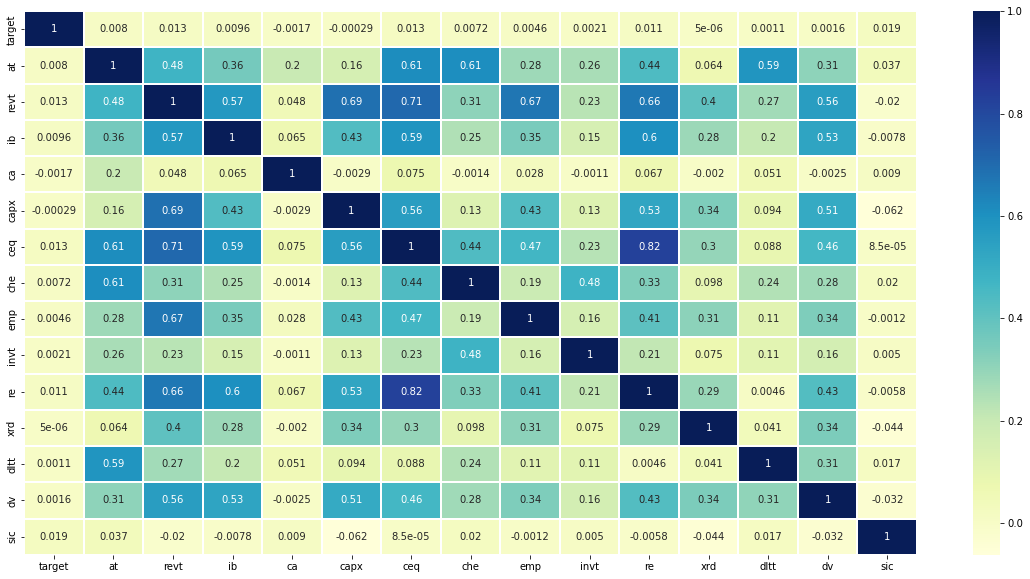

In [12]:
fig, ax = plt.subplots(figsize=(20,10))  
sns.heatmap(finance_features.corr(), cmap="YlGnBu", linewidths=0.1, annot=True, ax=ax)

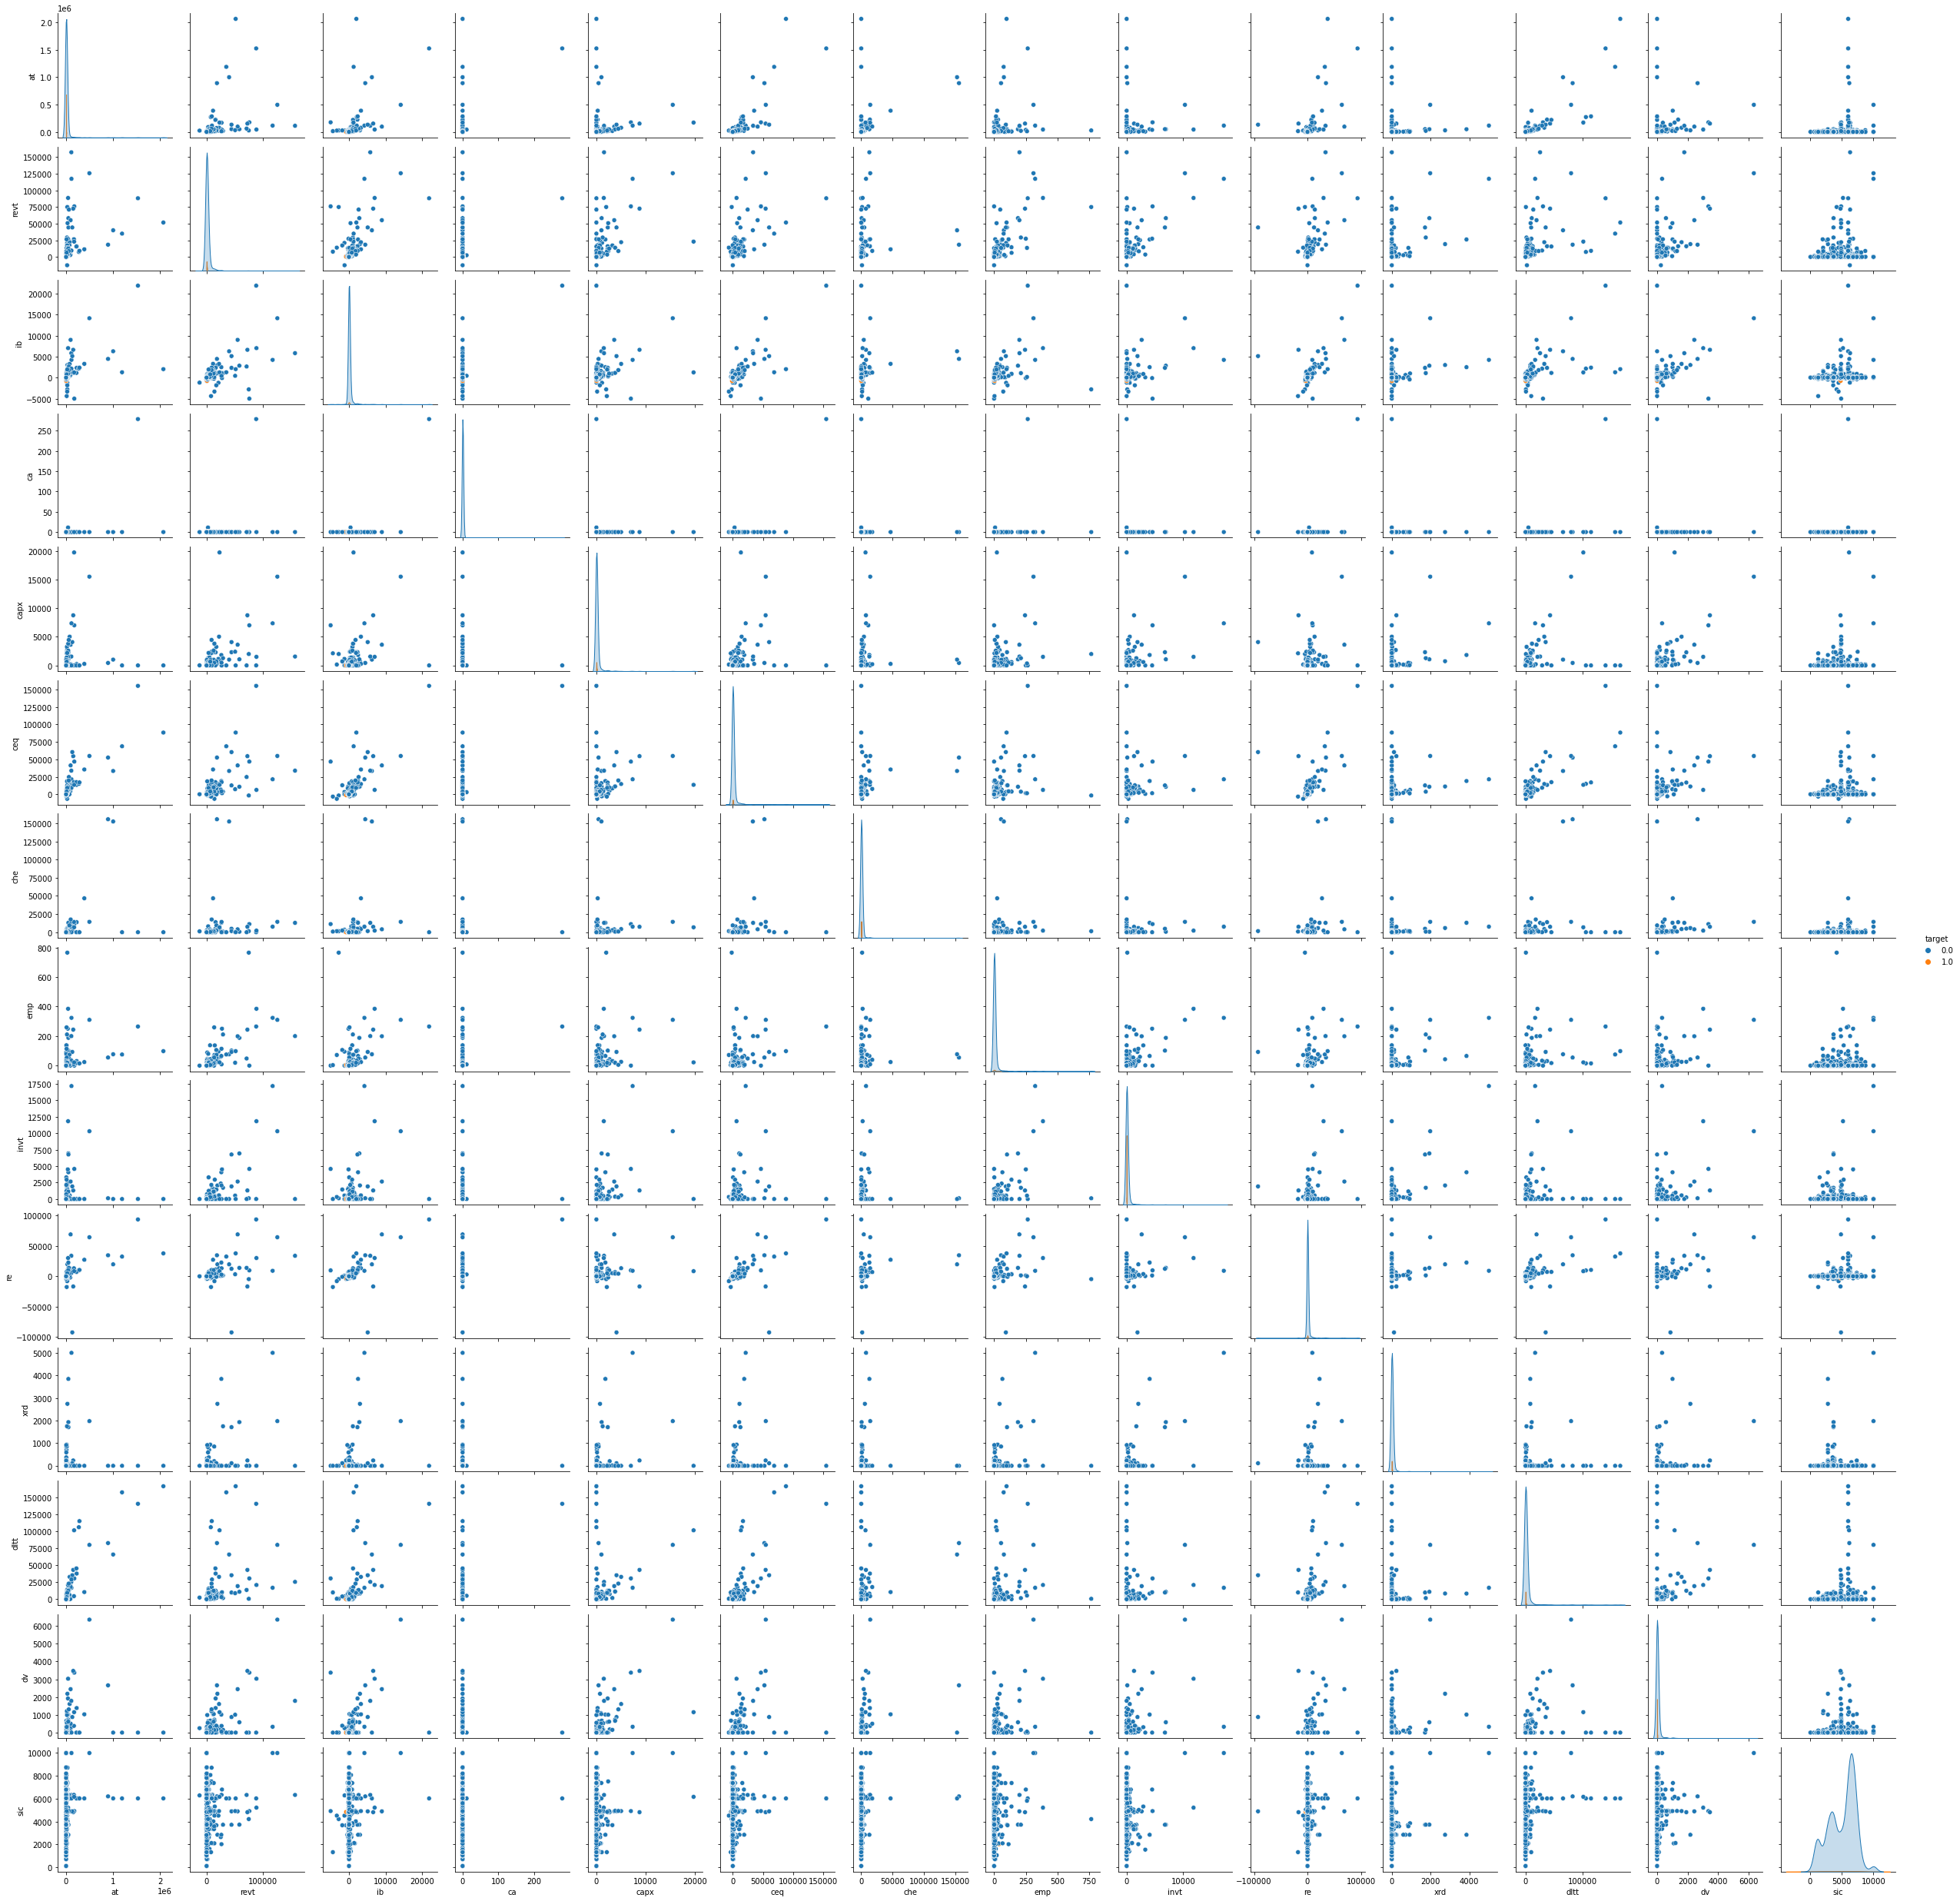

In [13]:
# pairploting on sample dataset
sns.pairplot(finance_features.sample(int(len(finance_features)*0.005)), hue='target', height=2.5)

In [14]:
# confusion Matrix Plotting

def confusion_matrix_plot(cfn_mat):
    ax= plt.subplot()

    group_names = ['True Neg','False Pos','False Neg','True Pos']

    group_counts = ["{0:0.0f}".format(value) for value in cfn_mat.flatten()]

    group_percentages = ["{0:.2%}".format(value) for value in cfn_mat.flatten()/np.sum(cfn_mat)]

    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cfn_mat, annot=labels, fmt='', cmap='icefire')

    # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['not aquired', 'acquired']); ax.yaxis.set_ticklabels(['not acquired', 'acquired']);
    plt.show()

In [15]:
model_comparison_cols = ['Model Name','Accuracy','Precision','Recall','F1 Score']

In [16]:
model_comparison_data = []

# Train Test Split of Data

In [17]:
# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(finance_features, y, test_size=0.3,random_state=100)

In [18]:
uniqueTrain, counts = np.unique(y_train, return_counts=True)
dict(zip(uniqueTrain, counts))

{0.0: 156202, 1.0: 1305}

In [19]:
uniqueTest, counts = np.unique(y_test, return_counts=True)
dict(zip(uniqueTest, counts))

{0.0: 66947, 1.0: 556}

In [20]:
numClass = len(uniqueTrain)

In [21]:
# SVM takes time to train, hence taking 5% sample of the training data to train the model

sampleN = int(len(X_train)*0.003)
print("Sample no.:", sampleN)

# Getting sample which contains both classes
notReady = True
while(notReady):
    sample_X = X_train.sample(sampleN)
    notReady = len(np.unique(sample_X)) < numClass

sample_y = sample_X['target']


Sample no.: 472


In [22]:
# Cleaning sample_X, X_train and X_test for remaining models after proper samples are taken.

sample_X.drop(columns=['target'],inplace=True)
X_train.drop(columns=['target'],inplace=True)
X_test.drop(columns=['target'],inplace=True)

## SVM

Training SVM Model

In [23]:
clf = svm.SVC(kernel='linear')

In [24]:
# Taking too much time
# clf.fit(X_train, y_train)

clf.fit(sample_X,sample_y)

SVC(kernel='linear')

Predicting Target with SVM

In [25]:
y_pred_svm = clf.predict(X_test)

In [26]:
# unique, counts = np.unique(y_pred_svm, return_counts=True)
# dict(zip(unique, counts))

Metric Calculations for SVM

In [27]:
svm_accuracy = round(metrics.accuracy_score(y_test, y_pred_svm)*100,2)
print("Accuracy:",svm_accuracy)

Accuracy: 98.63


In [28]:
svm_precision = metrics.precision_score(y_test, y_pred_svm)
print("Precision:",svm_precision)

Precision: 0.013262599469496022


In [29]:
svm_recall = metrics.recall_score(y_test, y_pred_svm)
print("Recall:",svm_recall)

Recall: 0.008992805755395683


In [30]:
svm_f1 = metrics.f1_score(y_test, y_pred_svm)
print("F1 Score:",svm_f1)

F1 Score: 0.010718113612004287


In [31]:
model_comparison_data.append(["Linear SVM",svm_accuracy, svm_precision, svm_recall, svm_f1])

In [32]:
cm_svm = metrics.confusion_matrix(y_test, y_pred_svm)
print(cm_svm)

[[66575   372]
 [  551     5]]


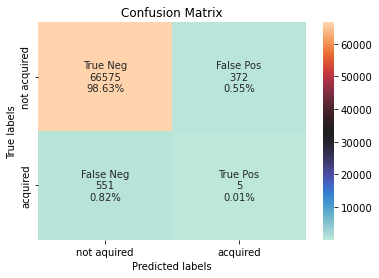

In [33]:
confusion_matrix_plot(cm_svm)

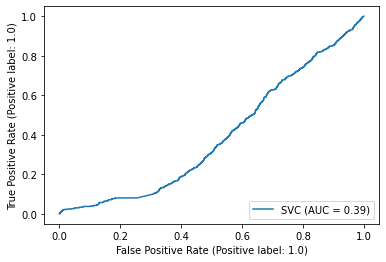

In [34]:
metrics.RocCurveDisplay.from_estimator(clf,X_test, y_test)

## Logistic Regression

In [35]:
logisticRegr = LogisticRegression(solver='lbfgs', max_iter=1000)

Training Logistic Regression Model

In [36]:
logisticRegr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

Predicting Target with Logistic Regression

In [37]:
y_pred_lr = logisticRegr.predict(X_test)

Metric Calculation for Logistic Regression

In [38]:
unique, counts = np.unique(y_pred_lr, return_counts=True)
dict(zip(unique, counts))

{0.0: 67494, 1.0: 9}

In [39]:
lrScore = logisticRegr.score(X_test, y_test)
print(lrScore)

0.9916300016295572


In [40]:
lr_accuracy = round(metrics.accuracy_score(y_test, y_pred_lr)*100,2)
print("Accuracy:",lr_accuracy)

Accuracy: 99.16


In [41]:
lr_precision = metrics.precision_score(y_test, y_pred_lr)
print("Precision:",lr_precision)

Precision: 0.0


In [42]:
lr_recall = metrics.recall_score(y_test, y_pred_lr)
print("Recall:",lr_recall)

Recall: 0.0


In [43]:
lr_f1 = metrics.f1_score(y_test, y_pred_lr)
print("F1 Score:",lr_f1)

F1 Score: 0.0


In [44]:
model_comparison_data.append(["Logistic Regression",lr_accuracy, lr_precision, lr_recall, lr_f1])

In [45]:
cm_lr= metrics.confusion_matrix(y_test, y_pred_lr)
print(cm_lr)

[[66938     9]
 [  556     0]]


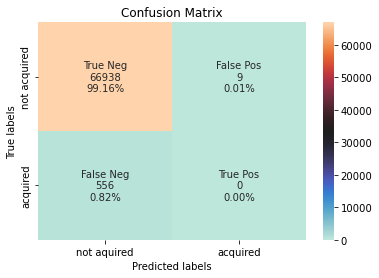

In [46]:
confusion_matrix_plot(cm_lr)

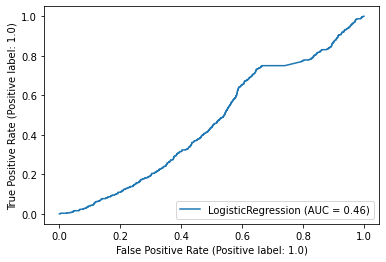

In [47]:
metrics.RocCurveDisplay.from_estimator(logisticRegr,X_test, y_test)

## Decision Tree

In [48]:
dtree = DecisionTreeClassifier()

Fitting Decision Tree

In [49]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

Predicting

In [50]:
y_pred_tree= dtree.predict(X_test)

Metric Calculations

In [51]:
tree_accuracy = round(metrics.accuracy_score(y_test, y_pred_tree)*100,2)
print("Accuracy:",tree_accuracy)

Accuracy: 98.7


In [52]:
tree_precision = metrics.precision_score(y_test, y_pred_tree)
print("Precision:",tree_precision)

Precision: 0.22673434856175972


In [53]:
tree_recall = metrics.recall_score(y_test, y_pred_tree)
print("Recall:",tree_recall)

Recall: 0.24100719424460432


In [54]:
tree_f1 = metrics.f1_score(y_test, y_pred_tree)
print("F1 Score:",tree_f1)

F1 Score: 0.2336530078465562


In [55]:
model_comparison_data.append(["Decision Tree",tree_accuracy, tree_precision, tree_recall, tree_f1])

In [56]:
cm_tree= metrics.confusion_matrix(y_test, y_pred_tree)
print(cm_tree)

[[66490   457]
 [  422   134]]


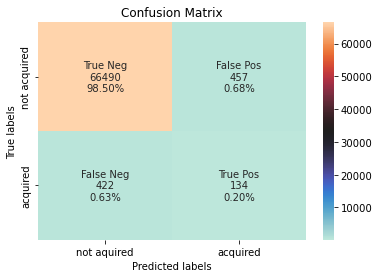

In [57]:
confusion_matrix_plot(cm_tree)

In [58]:
# let's create a dictionary of features and their importance values
feat_dict= {}
for col, val in sorted(zip(X_train.columns, dtree.feature_importances_),key=lambda x:x[1],reverse=True):
  feat_dict[col]=val

In [59]:
feat_df = pd.DataFrame({'Feature':feat_dict.keys(),'Importance':feat_dict.values()})

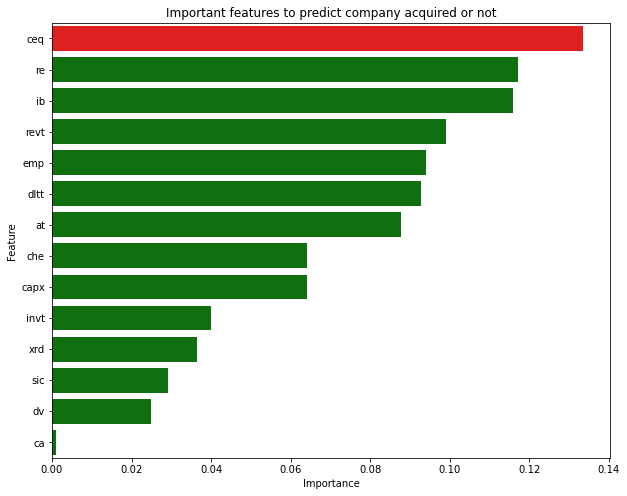

In [60]:
values = feat_df.Importance    
idx = feat_df.Feature
plt.figure(figsize=(10,8))
clrs = ['green' if (x < max(values)) else 'red' for x in values ]
sns.barplot(y=idx,x=values,palette=clrs).set(title='Important features to predict company acquired or not')
plt.show()

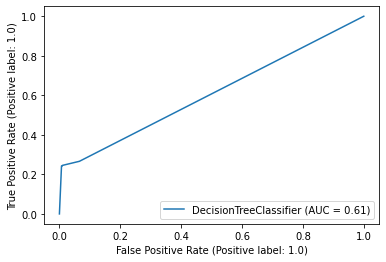

In [61]:
metrics.RocCurveDisplay.from_estimator(dtree,X_test, y_test)

## MLPClassifier

In [62]:
mlpClf = MLPClassifier(max_iter=300, activation = 'relu', solver='adam', random_state=1)

Training Model

In [63]:
mlpClf.fit(X_train, y_train)

MLPClassifier(max_iter=300, random_state=1)

Predicting

In [64]:
y_pred_mlp = mlpClf.predict(X_test)

Metric Calculations

In [65]:
mlp_accuracy = round(metrics.accuracy_score(y_test, y_pred_mlp)*100,2)
print("Accuracy:",mlp_accuracy)

Accuracy: 99.17


In [66]:
mlp_precision = metrics.precision_score(y_test, y_pred_mlp)
print("Precision:",mlp_precision)

Precision: 0.3333333333333333


In [67]:
mlp_recall = metrics.recall_score(y_test, y_pred_mlp)
print("Recall:",mlp_recall)

Recall: 0.0017985611510791368


In [68]:
mlp_f1 = metrics.f1_score(y_test, y_pred_mlp)
print("F1 Score:",mlp_f1)

F1 Score: 0.0035778175313059034


In [69]:
model_comparison_data.append(["MLP Classifier",mlp_accuracy, mlp_precision, mlp_recall, mlp_f1])

In [70]:
cm_mlp= metrics.confusion_matrix(y_test, y_pred_mlp)
print(cm_mlp)

[[66945     2]
 [  555     1]]


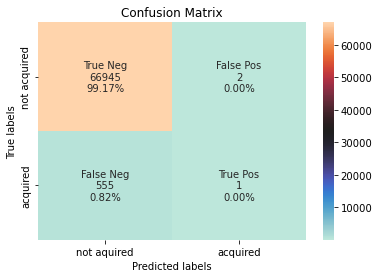

In [71]:
confusion_matrix_plot(cm_mlp)

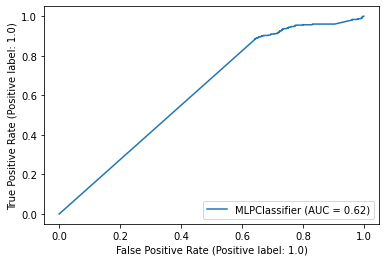

In [72]:
metrics.RocCurveDisplay.from_estimator(mlpClf,X_test,y_test)

# Model Comaparison

In [73]:
modelDf= pd.DataFrame(model_comparison_data,columns=model_comparison_cols)

In [74]:
modelDf.sort_values('F1 Score')

,Model Name,Accuracy,Precision,Recall,F1 Score
1,Logistic Regression,99.16,0.000000,0.000000,0.000000
3,MLP Classifier,99.17,0.333333,0.001799,0.003578
0,Linear SVM,98.63,0.013263,0.008993,0.010718
2,Decision Tree,98.70,0.226734,0.241007,0.233653


Text(0, 0.5, 'F1 Score')

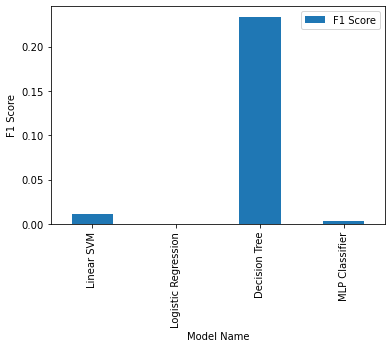

In [75]:
ax = modelDf.plot.bar(x='Model Name', y='F1 Score')
plt.ylabel('F1 Score')